In [3]:
# Always a bit risky, but I think the chance for name space convolution is small 
import numpy as np
import pandas as pd
from plotnine import *
from plotnine.data import mtcars # Classic example data set 

mtcars["gear"] = pd.Categorical(mtcars["gear"]) # Make it easier downstream 

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

# Proportions when saving figures 
BASE_HEIGHT = 5
BASE_WIDTH = 7.0

# Directory for saving figures
dir_save = ""


## Example 1 

Example of three datasets with the same summary statistics, but where only one dataset actually fits a linear trend-line.

     x      y Data_set
0   10   8.04        1
1    8   6.95        1
2   13   7.58        1
3    9   8.81        1
4   11   8.33        1
5   14   9.96        1
6    6   7.24        1
7    4   4.26        1
8   12  10.84        1
9    7   4.82        1
10   5   5.68        1
0   10   9.14        2
1    8   8.14        2
2   13   8.74        2
3    9   8.77        2
4   11   9.26        2
5   14   8.10        2
6    6   6.13        2
7    4   3.10        2
8   12   9.13        2
9    7   7.26        2
10   5   4.74        2
0   10   7.46        3
1    8   6.77        3
2   13  12.74        3
3    9   7.11        3
4   11   7.81        3
5   14   8.84        3
6    6   6.08        3
7    4   5.39        3
8   12   8.15        3
9    7   6.42        3
10   5   5.73        3
0    8   6.58        4
1    8   5.76        4
2    8   7.71        4
3    8   8.84        4
4    8   8.47        4
5    8   7.04        4
6    8   5.25        4
7   19  12.50        4
8    8   5.56        4
9    8   7.

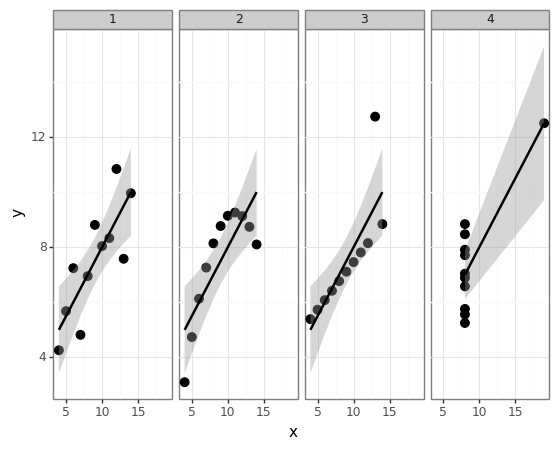

<ggplot: (167374229348)>

In [4]:
data1 = pd.DataFrame({"x" : [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], 
                      "y" : [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68], 
                      "Data_set" : "1"})
data2 = pd.DataFrame({"x" : [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], 
                      "y" : [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
                      "Data_set" : "2"})
data3 = pd.DataFrame({"x" : [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], 
                      "y" : [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
                      "Data_set" : "3"})
data4 = pd.DataFrame({"x" : [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8],
                      "y" : [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89],
                      "Data_set" : "4"})

data_plot = pd.concat([data1, data2, data3, data4])            
print(data_plot)
p = (ggplot(data_plot, aes("x", "y"))
    + geom_point(size=3.0)
    + stat_smooth(method='lm')
    + facet_grid("~Data_set")
    + theme_bw())

p.save(filename=dir_save + "Fig1.png", width=BASE_WIDTH*2.0, height=BASE_HEIGHT, dpi=300, verbose=False)
p


Only dataset1 actually follows a linear trend, but looking at the correlation statistics all datasets can be though to do so as $R^2=0.67$. This clearly highlights how good visuals can go beyond summary statistics.

## Understanding the grammar

A graph always starts with a dataset and initial aesthetics (mapping)


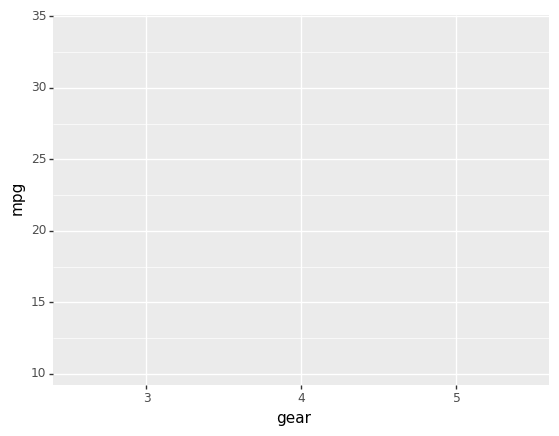

<ggplot: (8749348869425)>

In [133]:
p = (ggplot(mtcars, aes('gear', 'mpg')))
p.save(filename=dir_save + "Grammar_p1.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)
p

We can then add one or several layers where each layer consist of geometrical object, position, and statistical transformation.

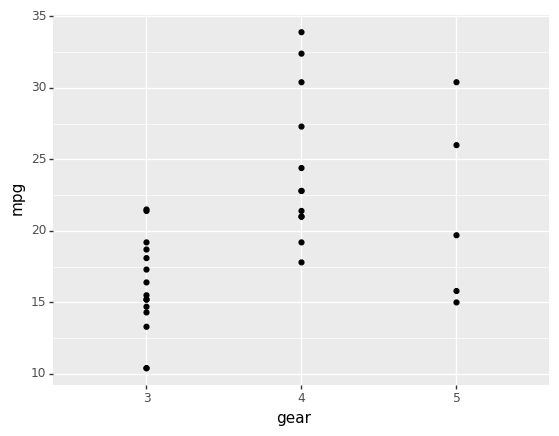

<ggplot: (8749345692061)>

In [134]:
# Point is the geometrical object
# Stat and position are identity by default
p = (ggplot(mtcars, aes('gear', 'mpg')) 
    + geom_point(stat = "identity", 
                 position = "identity")) 

p.save(filename=dir_save + "Grammar_p2.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)
p 

With stat and identity we can compute statistical properties (please note that we can add several layers);

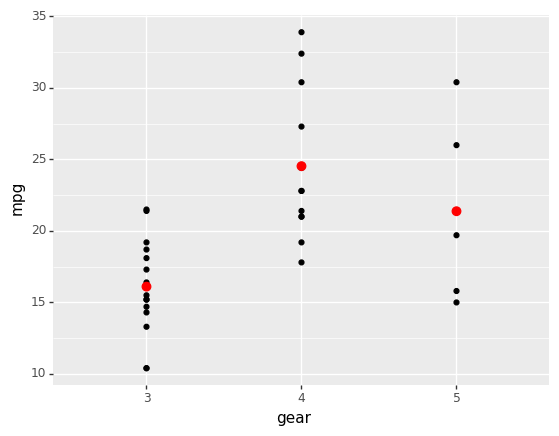

<ggplot: (8749345618375)>

In [135]:
(ggplot(mtcars, aes('gear', 'mpg')) 
    + geom_point()
    + geom_point(stat = "summary", fun_y = np.mean, 
                 position = "identity", 
                 size = 3.0, 
                 color="red"))

And with position we can jitter the data points 

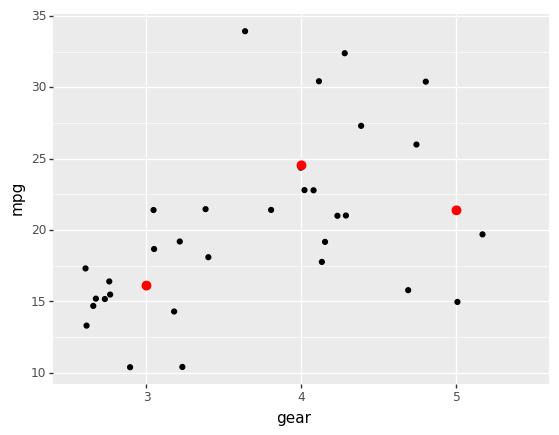

<ggplot: (8749345593682)>

In [136]:
p = (ggplot(mtcars, aes('gear', 'mpg')) 
    + geom_point(position = "jitter")
    + geom_point(stat = "summary", fun_y = np.mean, 
                 position = "identity", 
                 size = 3.0, 
                 color="red"))

p.save(filename=dir_save + "Grammar_p3.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)
p


Note, each geom has its own default statistics and position.

With scale we map the aesthetics to the visible space, for example we can map variables to a color scale 

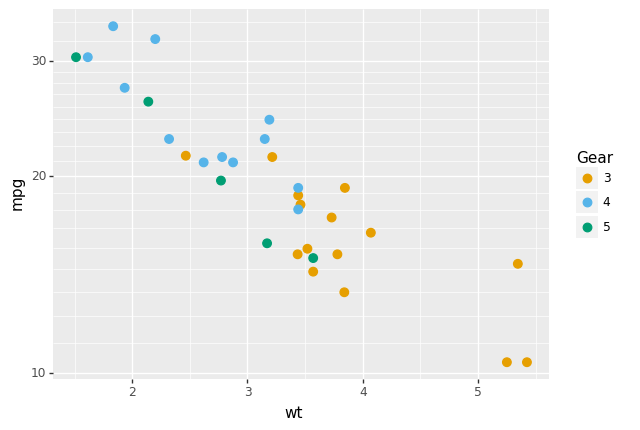

<ggplot: (8749345532034)>

In [137]:
p = (ggplot(mtcars, aes("wt", "mpg", color = "gear")) 
    + geom_point(size=3.0)
    + scale_y_log10() # Scale data axis 
    + labs(x = "wt", y = "mpg") # Set name of axis 
    + scale_color_manual(values = cbPalette, name = "Gear")) # Change to color scaling

p.save(filename=dir_save + "Grammar_p4.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)
p

With coordinates we dictate how we transform the coordinate system;

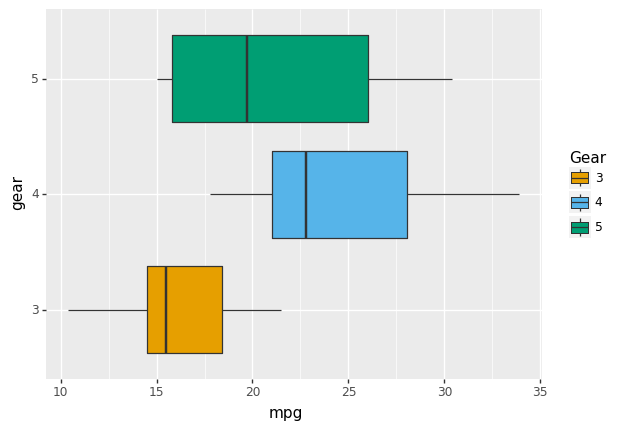

<ggplot: (8749345621782)>

In [138]:
p = (ggplot(mtcars, aes('gear', 'mpg', fill = "gear")) 
    + geom_boxplot()
    + coord_flip()
    + scale_fill_manual(values=cbPalette, name = "Gear"))

p.save(filename=dir_save + "Grammar_p5.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)
p

Lastly, we can specify the esthetics of graph using a theme, where we for example can change the axis text size

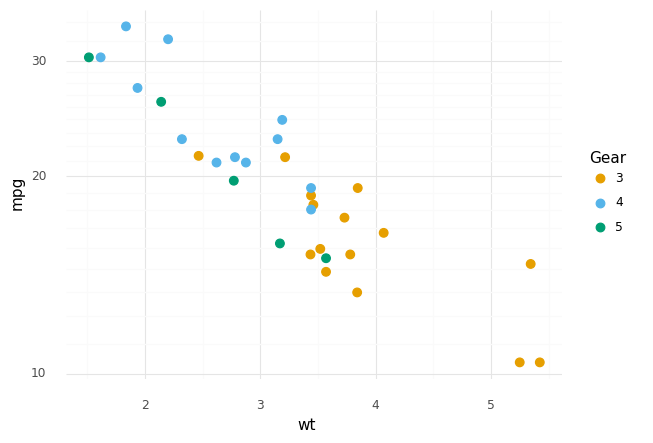

<ggplot: (8749345678873)>

In [139]:
p = (ggplot(mtcars, aes("wt", "mpg", color = "gear")) 
    + geom_point(size=3.0)
    + scale_y_log10() # Scale data axis 
    + labs(x = "wt", y = "mpg") # Set name of axis 
    + scale_color_manual(values = cbPalette, name = "Gear")
    + theme_minimal()) # Change to color scaling

p.save(filename=dir_save + "Grammar_p6.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)
p

Overall, the layer system with geom, identity and stat is highly flexible, and there are several constructors [available](https://plotnine.readthedocs.io/en/stable/api.html#geoms). In cases like as when computing regression lines there are nice layer constructors that run the statistical calculations in the background:

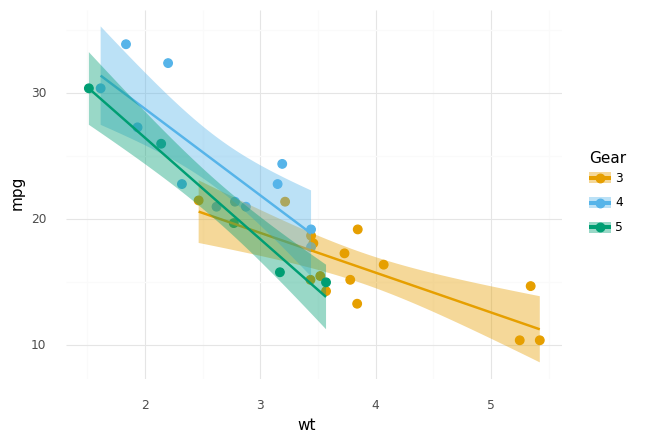

<ggplot: (8749345747484)>

In [140]:
p = (ggplot(mtcars, aes("wt", "mpg", color = "gear", fill = "gear")) 
    + geom_point(size=3.0)
    + geom_smooth(method="lm")  
    + labs(x = "wt", y = "mpg") 
    + scale_fill_manual(values = cbPalette, name = "Gear")
    + scale_color_manual(values = cbPalette, name = "Gear") 
    + theme_minimal()) 

p.save(filename=dir_save + "Grammar_p7.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)
p